# **Download the Dataset**

In [ ]:
import urllib.request
import json
import pandas as pd

# Download the sarcasm dataset from the given URL
url = "https://storage.googleapis.com/tensorflow-1-public/course3/sarcasm.json"
filename = "sarcasm.json"
urllib.request.urlretrieve(url, filename)

# Load the dataset into a Python object
with open(filename, 'r') as f:
    data = json.load(f)

# Convert the loaded JSON data into a pandas DataFrame
df = pd.DataFrame(data)

# Display the first few rows and the shape of the dataset
print(df.head())
print("Dataset shape:", df.shape)


                                        article_link  \
0  https://www.huffingtonpost.com/entry/versace-b...   
1  https://www.huffingtonpost.com/entry/roseanne-...   
2  https://local.theonion.com/mom-starting-to-fea...   
3  https://politics.theonion.com/boehner-just-wan...   
4  https://www.huffingtonpost.com/entry/jk-rowlin...   

                                            headline  is_sarcastic  
0  former versace store clerk sues over secret 'b...             0  
1  the 'roseanne' revival catches up to our thorn...             0  
2  mom starting to fear son's web series closest ...             1  
3  boehner just wants wife to listen, not come up...             1  
4  j.k. rowling wishes snape happy birthday in th...             0  
Dataset shape: (26709, 3)


/tmp/ipython-input-2051972669.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette="coolwarm")


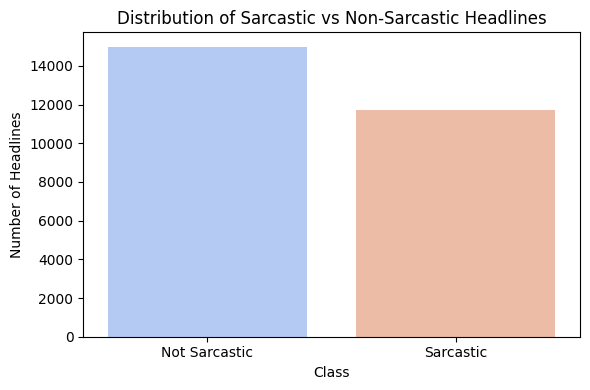

In [ ]:
# Visualize the class distribution
class_counts = df['is_sarcastic'].value_counts()

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.barplot(x=class_counts.index, y=class_counts.values, palette="coolwarm")
plt.title("Distribution of Sarcastic vs Non-Sarcastic Headlines")
plt.xticks([0, 1], ['Not Sarcastic', 'Sarcastic'])
plt.ylabel("Number of Headlines")
plt.xlabel("Class")
plt.tight_layout()
plt.show()

In [ ]:
class_counts

,count
is_sarcastic,
0,14985
1,11724


# **Split the Dataset**

In [ ]:
from sklearn.model_selection import train_test_split

X = df['headline']
y = df['is_sarcastic']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# **Data Preprocessing**

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Set maximum number of words to keep, based on word frequency
vocab_size = 10000
max_length = 120 # max number of words in a headline
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

# Initialize the Tokenizer class
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)

# Generate the word index dictionary
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index

# Generate and pad the training sequences
training_sequences = tokenizer.texts_to_sequences(X_train)
training_padded = pad_sequences(training_sequences, maxlen = max_length, padding = padding_type, truncating = trunc_type)

# Generate and pad the testing sequences
testing_sequences = tokenizer.texts_to_sequences(X_test)
testing_padded = pad_sequences(testing_sequences, maxlen = max_length, padding = padding_type, truncating = trunc_type)

# Convert the labels lists into numpy arrays
training_labels = np.array(y_train)
testing_labels = np.array(y_test)

# **Build and Compile the Model**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras import regularizers

# Define the model
model = Sequential([
    Embedding(vocab_size, 64, input_length=max_length),
    Bidirectional(LSTM(64, return_sequences=True)),
    Dropout(0.5),
    Bidirectional(LSTM(32)),
    Dropout(0.4),
    Dense(24, activation='relu', kernel_regularizer = regularizers.l2(0.001)),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(loss = 'binary_crossentropy',
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0005),
              metrics = ['accuracy'])

# Print the model summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

# **Train the Model**

In [ ]:
# Train the model

from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

history = model.fit(
    training_padded, training_labels,
    epochs=10,
    validation_data=(testing_padded, testing_labels),
    callbacks=[early_stop],
    verbose=2
)


Epoch 1/10
668/668 - 173s - 259ms/step - accuracy: 0.7908 - loss: 0.4522 - val_accuracy: 0.8506 - val_loss: 0.3534
Epoch 2/10
668/668 - 198s - 297ms/step - accuracy: 0.9067 - loss: 0.2512 - val_accuracy: 0.8639 - val_loss: 0.3421
Epoch 3/10
668/668 - 202s - 302ms/step - accuracy: 0.9458 - loss: 0.1642 - val_accuracy: 0.8607 - val_loss: 0.3982
Epoch 4/10
668/668 - 164s - 245ms/step - accuracy: 0.9661 - loss: 0.1072 - val_accuracy: 0.8516 - val_loss: 0.4167
